In [1]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns 
import numpy as np
from palmerpenguins import load_penguins
sns.set_style('whitegrid')
penguins = load_penguins()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
data = penguins.copy()
data = data.loc[data['species'] == "Adelie"]
data = data[['bill_length_mm','bill_depth_mm','flipper_length_mm']]

data

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
3,NaN,NaN,NaN
4,36.7,19.3,193.0
...,...,...,...
147,36.6,18.4,184.0
148,36.0,17.8,195.0
149,37.8,18.1,193.0
150,36.0,17.1,187.0


In [5]:
data.isnull().sum()

bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
147,36.6,18.4,184.0
148,36.0,17.8,195.0
149,37.8,18.1,193.0
150,36.0,17.1,187.0


In [31]:
print("Wartość oczekiwana: \n", 
      pd.DataFrame(np.mean(penguins, axis = 0)))
print("\n Empiryczna macierz kowariancji \n", np.cov(data.T))
print(np.shape(np.cov(data.T)))
print("\n Empiryczna macierz korelacji \n", np.corrcoef(data.T))
print("\n Uogólniona wariancja z próby \n {:.2f}".format(np.linalg.det(np.cov(data.T))))
print("\n Całkowita wariancja z próby \n {:.2f}".format(np.trace(np.cov(data.T))))


Wartość oczekiwana: 
                              0
bill_length_mm       43.921930
bill_depth_mm        17.151170
flipper_length_mm   200.915205
body_mass_g        4201.754386
year               2008.029070

 Empiryczna macierz kowariancji 
 [[ 7.09372539  1.26860177  5.6742649 ]
 [ 1.26860177  1.48023664  2.44749669]
 [ 5.6742649   2.44749669 42.76450331]]
(3, 3)

 Empiryczna macierz korelacji 
 [[1.         0.39149169 0.32578472]
 [0.39149169 1.         0.30762018]
 [0.32578472 0.30762018 1.        ]]

 Uogólniona wariancja z próby 
 325.30

 Całkowita wariancja z próby 
 51.34


D:\Programy\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


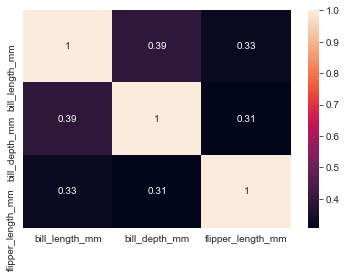

In [9]:
import matplotlib.pyplot as plt
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<ipython-input-10-f6082e49d99a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_2.corr()


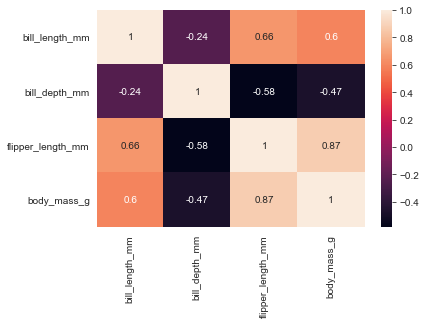

In [10]:
import matplotlib.pyplot as plt
data_2 = penguins.drop(['year'], axis = 1)
corr_matrix = data_2.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

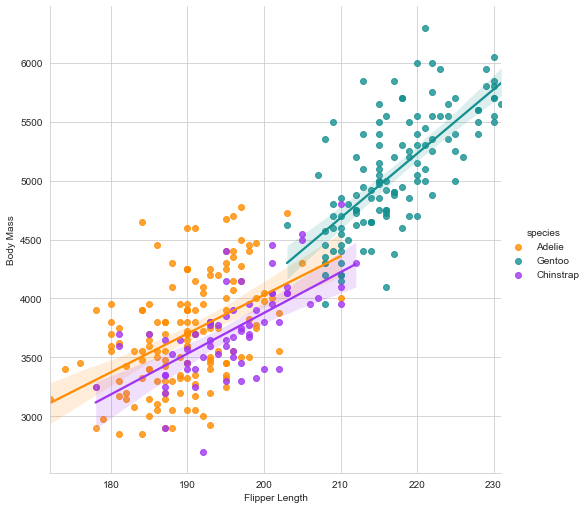

In [11]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

## WYKRES 1

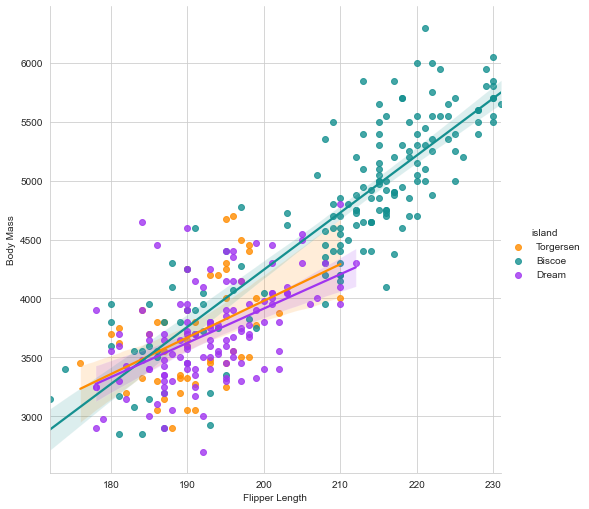

In [12]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="island",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

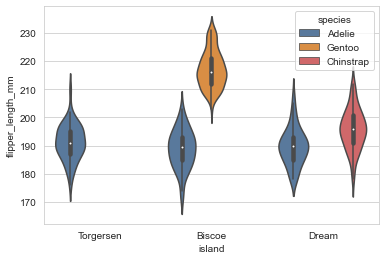

In [29]:
sns.violinplot(data=penguins, x="island", y="flipper_length_mm", hue="species", palette = ["#4E79A7", "#F28E2B", "#E15759"])

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

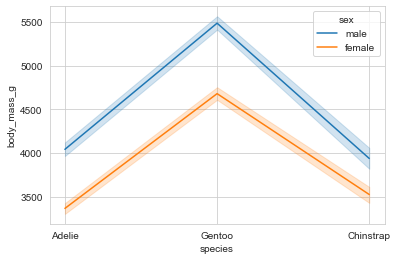

In [28]:
sns.lineplot(x="species", y="body_mass_g",
             hue="sex",
             data=penguins)